In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
sns.set()

attendance_df = pd.read_csv('../data/matches_transformed.csv', sep=',')

X = attendance_df.drop('attendance', axis=1)
y = attendance_df['attendance']

In [2]:
## Features standardisieren
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_sc = scaler.transform(X)

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
# from sklearn.neural_network import MLPRegressor

models = [
    LinearRegression(),
    Lasso(alpha=0.5011872336272735),
    Ridge(alpha=0.006579332246575682),
    KNeighborsRegressor(p = 2, n_neighbors=4),
    DecisionTreeRegressor(max_depth=4),
    RandomForestRegressor(n_estimators= 200),
    AdaBoostRegressor(),
    GradientBoostingRegressor(),
    HistGradientBoostingRegressor(),
    # MLPRegressor(max_iter=35000)
]

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
kfold = 5
model_names = []
model_scores = []
cv = LeaveOneOut()

for model in models:
    model_name = model.__class__.__name__
    print(model_name)
    scores = cross_val_score(model, X_sc, y, cv=kfold)
    for i in range(len(scores)):
        model_scores.append(scores[i])
        model_names.append(model_name)
print('done')

LinearRegression
Lasso
Ridge
KNeighborsRegressor
DecisionTreeRegressor
RandomForestRegressor
AdaBoostRegressor
GradientBoostingRegressor
HistGradientBoostingRegressor
done



mean
                                 scores
names                                  
AdaBoostRegressor              0.499711
DecisionTreeRegressor          0.440977
GradientBoostingRegressor      0.610520
HistGradientBoostingRegressor  0.611305
KNeighborsRegressor            0.394974
Lasso                          0.445424
LinearRegression               0.445201
RandomForestRegressor          0.531311
Ridge                          0.445202

std
                                 scores
names                                  
AdaBoostRegressor              0.116012
DecisionTreeRegressor          0.179814
GradientBoostingRegressor      0.101315
HistGradientBoostingRegressor  0.121047
KNeighborsRegressor            0.130231
Lasso                          0.131834
LinearRegression               0.132116
RandomForestRegressor          0.142953
Ridge                          0.132114


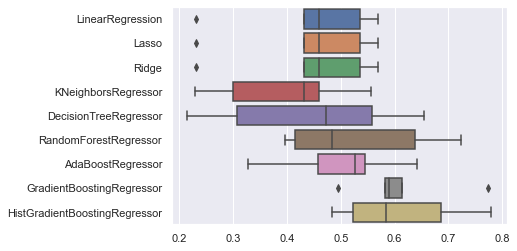

In [7]:
res_df = pd.DataFrame({
    'names' : model_names,
    'scores' : model_scores
})
print('\nmean')
print(res_df.groupby(['names']).mean())
print('\nstd')
print(res_df.groupby(['names']).std())

sns.boxplot(x=model_scores, y=model_names)
plt.show()

In [4]:
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statistics

names = []
fitting_time = []
pred_time = []
ms_error = []
r2 = []

In [5]:
for model in models:
    model_name = model.__class__.__name__
    print(model_name)
    loo = LeaveOneOut()
    loo_prediction = []
    loo_test = []
    loo_fitting_time = []
    loo_pred_time = []
    i = 0

    for train_index, test_index in loo.split(X_sc):
        i += 1
        X_train, X_test = X_sc[train_index], X_sc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        start_fitting_time = time.time()
        model.fit(X_train, y_train)
        used_fitting_time = time.time() - start_fitting_time

        start_pred_time = time.time()
        y_pred = model.predict(X_test)
        used_pred_time = time.time() - start_pred_time

        loo_prediction.append(y_pred)
        loo_test.append(y_test)
        loo_fitting_time.append(used_fitting_time)
        loo_pred_time.append(used_pred_time)
        if i%100 == 0:
            print(i)

    names.append(model_name)
    fitting_time.append(statistics.mean(loo_fitting_time))
    pred_time.append(statistics.mean(loo_pred_time))
    r2.append(r2_score(loo_test, loo_prediction))
    ms_error.append(mean_squared_error(loo_test, loo_prediction))

print('done')

LinearRegression
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
Lasso
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
Ridge
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
KNeighborsRegressor
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
DecisionTreeRegressor
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
RandomForestRegressor
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
AdaBoostRegressor
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
23

In [6]:
loo_res = pd.DataFrame({
    'names' : names,
    'fitting_time' : fitting_time,
    'pred_time': pred_time,
    'r2': r2,
    'ms_error': ms_error
})

print(loo_res)

                           names  fitting_time  pred_time        r2  \
0               LinearRegression      0.006148   0.000050  0.522644   
1                          Lasso      0.008201   0.000064  0.522710   
2                          Ridge      0.000605   0.000046  0.522645   
3            KNeighborsRegressor      0.004239   0.000315  0.486287   
4          DecisionTreeRegressor      0.005170   0.000047  0.623789   
5          RandomForestRegressor      2.771079   0.008312  0.793669   
6              AdaBoostRegressor      0.189154   0.001756  0.575439   
7      GradientBoostingRegressor      0.393842   0.000100  0.757541   
8  HistGradientBoostingRegressor      0.417290   0.001826  0.828127   

       ms_error  
0  2.538123e+07  
1  2.537773e+07  
2  2.538123e+07  
3  2.731436e+07  
4  2.000332e+07  
5  1.097073e+07  
6  2.257411e+07  
7  1.289167e+07  
8  9.138558e+06  


In [20]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(max_iter=35000)
i = 0

loo = LeaveOneOut()
loo_prediction = []
loo_test = []
loo_fitting_time = []
loo_pred_time = []


for train_index, test_index in loo.split(X_sc):
    i += 1
    X_train, X_test = X_sc[train_index], X_sc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    start_fitting_time = time.time()
    model.fit(X_train, y_train)
    used_fitting_time = time.time() - start_fitting_time

    start_pred_time = time.time()
    y_pred = model.predict(X_test)
    used_pred_time = time.time() - start_pred_time

    loo_prediction.append(y_pred)
    loo_test.append(y_test)
    loo_fitting_time.append(used_fitting_time)
    loo_pred_time.append(used_pred_time)
    if i%20 == 0:
        print(i)

names.append(model_name)
fitting_time.append(statistics.mean(loo_fitting_time))
pred_time.append(statistics.mean(loo_pred_time))
r2.append(r2_score(loo_test, loo_prediction))
ms_error.append(mean_squared_error(loo_test, loo_prediction))

20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500
520
540
560
580
600
620
640
660
680
700
720
740
760
780
800
820
840
860
880
900
920
940
960
980
1000
1020
1040
1060
1080
1100
1120
1140
1160
1180
1200
1220
1240
1260
1280
1300
1320
1340
1360
1380
1400


/Users/cyrillbader/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:587: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/Users/cyrillbader/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:587: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/Users/cyrillbader/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:587: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/Users/cyrillbader/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:587: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/Users/cyrillbader/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:587: UserWarning: Training interrupted by user.
  wa

In [28]:
names.append(model_name)
fitting_time.append(statistics.mean(loo_fitting_time[0:1400]))
pred_time.append(statistics.mean(loo_pred_time[0:1400]))
r2.append(r2_score(loo_test[0:1400], loo_prediction[0:1400]))
ms_error.append(mean_squared_error(loo_test[0:1400], loo_prediction[0:1400]))